In [1]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [2]:
df = pd.read_csv('C:\\Users\\USER\\Desktop\\UDEMY\\Python for Data Science and Machine Learning Bootcamp\\Machine Learning\\Deep Learning\\DATA\\cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# df.info()

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


C:\Users\USER\anaconda3\envs\data_env_old\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

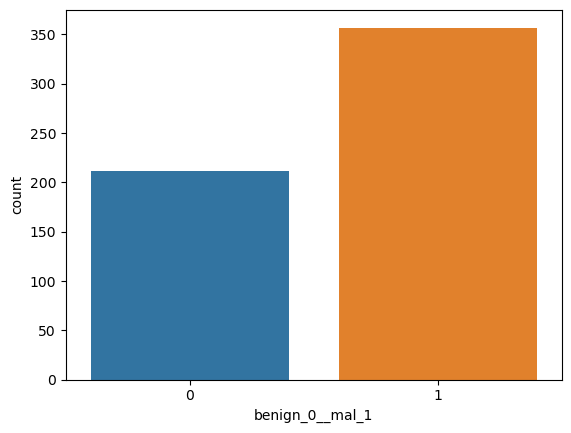

In [5]:
sns.countplot('benign_0__mal_1', data=df)

In [6]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

<AxesSubplot:>

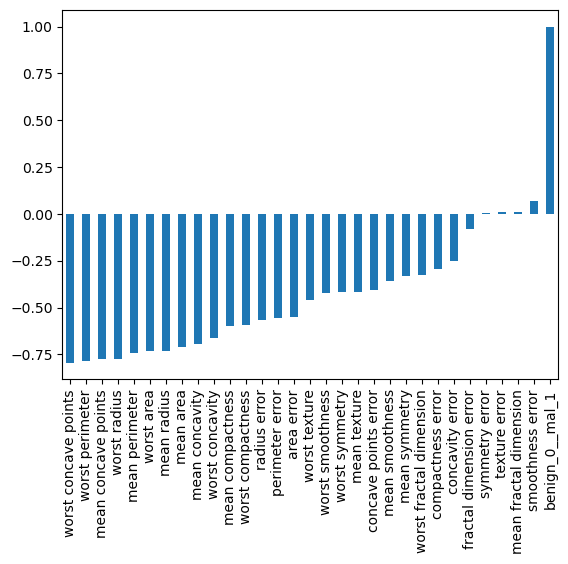

In [7]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

<AxesSubplot:>

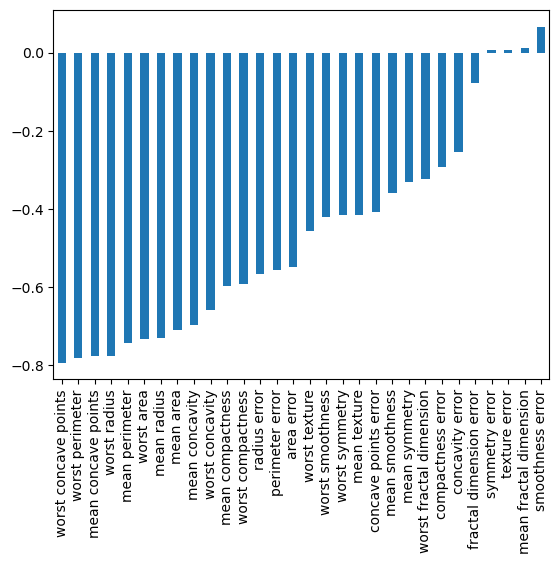

In [8]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

#dropping the last one ie benign_0__mal_1

<AxesSubplot:>

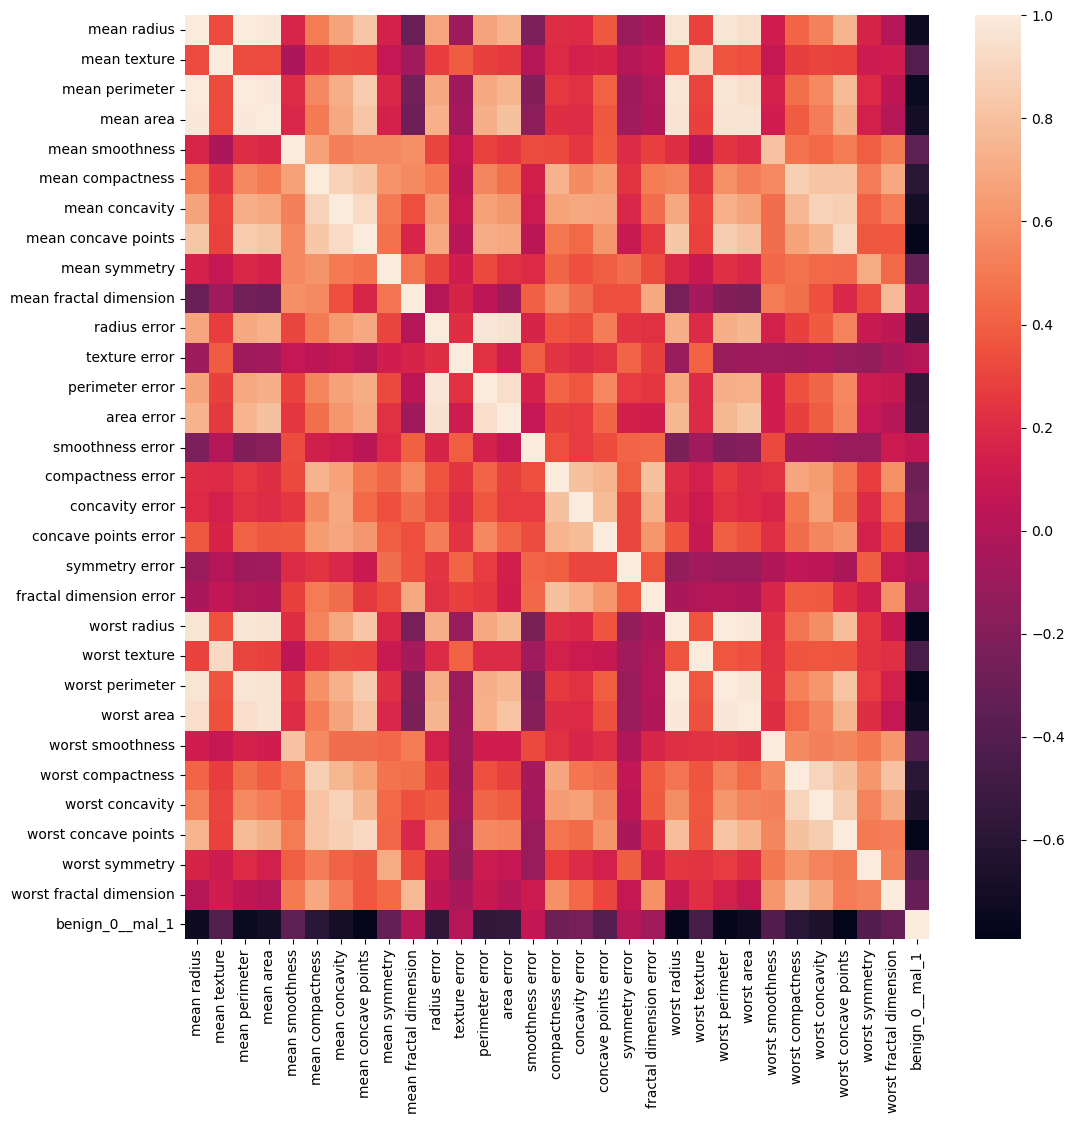

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [11]:
X = df.drop('benign_0__mal_1', axis=1).values

y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

We dont want to actually fit to the test data

We only want to fit to our training data to prevent data leakage

#### Dealing with Overfitting and Evaluation

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))  ##rectified linear unit
model.add(Dense(15, activation = 'relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

#Binary classification want the last activation to be sigmoid
# In binary classification One neuron outputting something b/w 0 and 1
# and that will decide what class this belongs to either malignant or benign

In [21]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.6904 - val_loss: 0.6673
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6677 - val_loss: 0.6409
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6373 - val_loss: 0.6141
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6056 - val_loss: 0.5864
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5840 - val_loss: 0.5526
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5441 - val_loss: 0.5096
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4983 - val_loss: 0.4596
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4581 - val_loss: 0.4071
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4083 - val_loss: 0.3578
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3524 - val_loss: 0.3186
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3060 - val_loss: 0.2894
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

In [79]:
# pd.DataFrame(model.history.history)

In [22]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

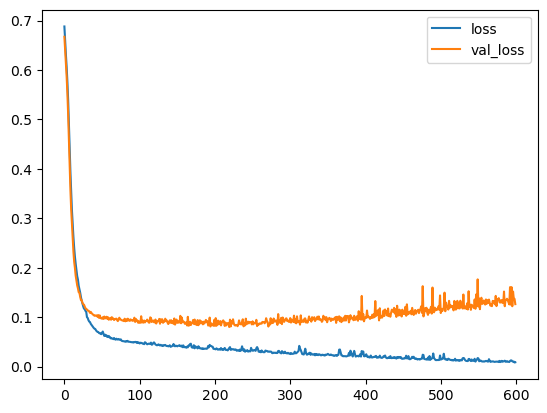

In [23]:
losses.plot()

In [24]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))  ##rectified linear unit
model.add(Dense(15, activation = 'relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
# help(EarlyStopping)

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience = 25 )

# monitor our validation loss try to minimized it 
# patience=25 mean we will wait 25 epochs even after we've kind of detected a stopping point

In [35]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test),
         callbacks = [early_stop])

#Its going to attemp to run on 600 epochs unless the early stop is triggered

# here the early stop was triggered at 29 it stop training after 27

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0382 - val_loss: 0.1336
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0428 - val_loss: 0.1201
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0269 - val_loss: 0.1262
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0266 - val_loss: 0.1311
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - val_loss: 0.1265
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0274 - val_loss: 0.1285
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0271 - val_loss: 0.1261
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0407 - val_loss: 0.1390
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0430 - val_loss: 0.1231
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0430 - val_loss: 0.1257
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0285 - val_loss: 0.1346
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

<AxesSubplot:>

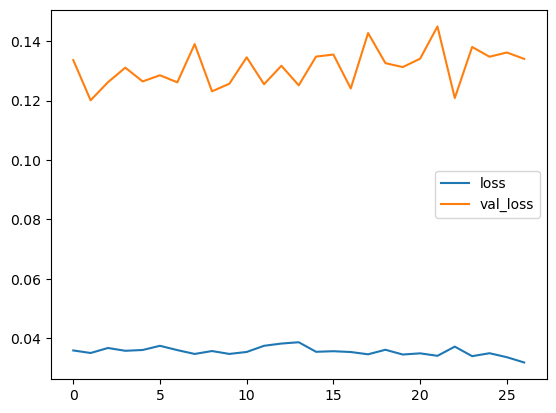

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [37]:
from tensorflow.keras.layers import Dropout

In [38]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))##rectified linear unit
model.add(Dropout(0.5))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [39]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test),
         callbacks = [early_stop])

#Its going to attemp to run on 600 epochs unless the early stop is triggered

# here the early stop was triggered at 29 it stop training after 140

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.6898 - val_loss: 0.6756
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6834 - val_loss: 0.6592
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6576 - val_loss: 0.6427
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6459 - val_loss: 0.6301
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6137 - val_loss: 0.6125
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6330 - val_loss: 0.5967
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6097 - val_loss: 0.5828
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6170 - val_loss: 0.5638
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6033 - val_loss: 0.5398
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5668 - val_loss: 0.5113
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5419 - val_loss: 0.4822
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

<AxesSubplot:>

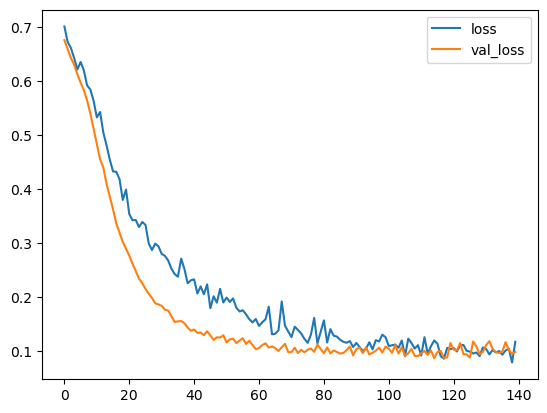

In [40]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [210]:
# model.evaluate(X_test_scaled, y_test)

In [214]:
# predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


##### Convert predictions to binary (0 or 1):

**We are predicting either a 0 or a 1**

In [41]:
pred_prob = model.predict(X_test)
pred_class = (pred_prob > 0.5).astype("int32")
pred_class



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [215]:
# predicted_classes = (predictions > 0.5).astype(int)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [44]:
print(confusion_matrix(y_test, pred_class))

[[54  1]
 [ 2 86]]


Our neterork onlt misclassified 3 (1+2) in our test set

We get better precision & recall performance  > 0.95 

We have 0.98 accuracy 